#### 图像可视化

In [57]:
import pandas as pd
import numpy as np
import math
from PIL import Image
import requests
import cv2
from glob import glob
from io import BytesIO
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import display,HTML
from IPython.display import Image as IPImage
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False 
from typing import Union, Optional,List, Dict
import matplotlib.pyplot as plt



In [69]:



def pil2cv_img(pil_img):
    return cv2.cvtColor(np.asarray(pil_img), cv2.COLOR_RGB2BGR)

def cv2_pilimg(cv2_img):
    return Image.fromarray(cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB))

def url2img(url_path='https://zihaobuck.oss-cn-hangzhou.aliyuncs.com/pict/cat1.jpg'):
    response = requests.get(url_path)
    image = Image.open(BytesIO(response.content))
    return image

def plot_images(images):
    """ 图片显示：images为PIL 图像 """

    if isinstance(images, list) and len(images) > 1:
        nrows = 1
        ncolums = len(images)
        if len(images) > 4:
            ncolums_ = math.sqrt(len(images))
            ncolums = int(ncolums_)
            nrows = int(ncolums + 1) if ncolums_ > ncolums else ncolums
        plt.figure(figsize=(12,8))
        for i, im in enumerate(images):
            plt.subplot(nrows, ncolums, i + 1)
            plt.grid(False)
            plt.imshow(im), plt.axis('off')
    else:
        plt.figure(figsize=(12,8))
        try:
            plt.imshow(images)
        except:
            plt.imshow(images[0])
        finally:
            plt.grid(False)
            plt.axis('off')


def show_images(imgfiles):
    """ 读取本地图片并显示 """
    if isinstance(imgfiles, list) and len(imgfiles) > 1:
        nrows = 1
        ncolums = len(imgfiles)
        if len(imgfiles) > 4:
            ncolums_ = math.sqrt(len(imgfiles))
            ncolums = int(ncolums_)
            nrows = int(ncolums + 1) if ncolums_ > ncolums else ncolums
        
        plt.figure(figsize=(12,8))
        for i, img_path in enumerate(imgfiles):
            plt.subplot(nrows, ncolums, i + 1)
            plt.grid(False)
            plt.imshow(Image.open(img_path).convert('RGB')), plt.axis('off')
    else:
        plt.figure(figsize=(12,8))
        try:
            plt.imshow(Image.open(imgfiles))
        except:
            plt.imshow(Image.open(imgfiles[0]))
        finally:
            plt.grid(False)
            plt.axis('off')


def url_gallery(urls: Optional[List], tags: Optional[List] = None, ids: Optional[List] = None, default_hight: Optional[str]='300px'):
    """展示图片"""

    figures = []
    if tags is None:
        tags = []
    if ids is None:
        ids = []
   
    
    for i, url in enumerate(urls):
       mid = ids[i] if ids else ''
       tag = tags[i] if tags else ''
       desc = str(mid) + "【点击显示大图】" if mid else mid
       
       info = f'<figcaption style="font-size: 1em;"><a target="_blank" href="{url}" style="word-break: normal;"> {desc} </a><br><b> {tag} </b></figcaption>'
       similar = f'<figcaption style="font-size: 1em;"><a target="_blank" href="{url} " style="word-break: normal;"> 【点击查看】 </a></figcaption>'
       
       figures.append(
            f"""
                <figure style="margin: 5px !important;">
                    {info}
                    <a target="_blank"  style="word-break: normal;"><img src="{url}" style="height: {default_hight}"></a>
                    {similar}
                </figure>
            """
            )

    return HTML(
                data=f"""
                    <div style="display: flex; flex-flow: row wrap; text-align: center;">
                    {''.join(figures)}
                    </div>
                    """
            )



def local_gallery(imgfiles: Optional[list], tags: Optional[list]=None, ids:Optional[list] = None, default_hight: Optional[str]='300px'):
    """ 图像显示 ：本地图片 """
    figures = []
    if tags is None:
        tags = []
    if ids is None:
        ids = []
    
    for i, img_path in enumerate(imgfiles):
        mid = ids[i] if ids else os.path.basename(img_path)
        tag = tags[i] if tags else ''
        
        file_info = f'<figcaption style="font-size: 1em;"><a target="_blank" href="{img_path}" style="display:inline;margin:1px"/> <br> {mid} </figcaption>'
        desc_img = f'<figcaption style="font-size: 1em;"> <b> {tag} </b> <br> </figcaption>'

        figures.append(
            f"""
                <figure style="margin: 5px !important;">
                    {file_info}
                    <a target="_blank"  style="word-break: normal;"><img src="{img_path}" style="height: {default_hight}"></a>
                    {desc_img}
                </figure>
            """
            )
    
    return HTML(
                data=f"""
                    <div style="display: flex; flex-flow: row wrap; text-align: center;">
                    {''.join(figures)}
                    </div>
                    """
            )





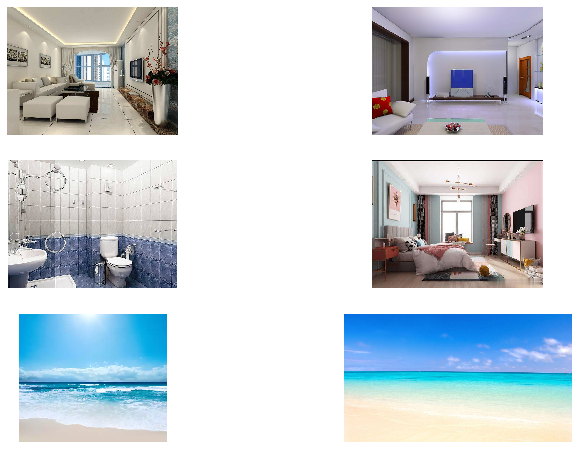

In [59]:

urls = ['https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fpic.16pic.com%2F00%2F16%2F64%2F16pic_1664996_b.jpg&refer=http%3A%2F%2Fpic.16pic.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661408152&t=ea842d03f1e5d6a0e85cf3f61fdf2920', 
        'https://img2.baidu.com/it/u=3663548919,3793842795&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=375',
        'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fpic.92to.com%2Flian%2F201511%2F21%2F74cf1a510d7b4232cb67688581b7b8fb.jpg&refer=http%3A%2F%2Fpic.92to.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661408885&t=5273b4fa1a152edef701782794d88ac9',
        'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fhaiju99.com%2Fu%2Fd5a4e48f-0af8-4f1b-b275-01539e39ae43%2Fimage%2F6376159666590758093454.jpg&refer=http%3A%2F%2Fhaiju99.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661411058&t=43ffaf5d05a0f37684cd4c6fc33a3a84',
       'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201704%2F30%2F20170430211314_tizAe.png&refer=http%3A%2F%2Fb-ssl.duitang.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661412828&t=6fe7d97e32e7a72604411e2593ee9832',
        'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fimg9.51tietu.net%2Fpic%2F2019-091305%2Fcbo4lx4vo0kcbo4lx4vo0k.jpg&refer=http%3A%2F%2Fimg9.51tietu.net&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661412828&t=9510d6397d13c2b4ab0480cd4b8c3875',
        ]


urls2 = ['https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fimgservice.suning.cn%2Fuimg1%2Fb2c%2Fimage%2FAm9OM-61On5oVgszQETGYQ.jpg&refer=http%3A%2F%2Fimgservice.suning.cn&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661414321&t=9d5ef6fb476b799253972d35c1a5e956',
        'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fpic1.16pic.com%2F00%2F34%2F65%2F16pic_3465993_b.jpg&refer=http%3A%2F%2Fpic1.16pic.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661414427&t=032701a8772f3554df011adcbd8febe2',
        'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fpic.16pic.com%2F00%2F36%2F07%2F16pic_3607516_b.jpg&refer=http%3A%2F%2Fpic.16pic.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661414427&t=18e74afe3adee3eb31cf343829d07b96',
        'https://img2.baidu.com/it/u=3321421978,1240716562&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=277',
        'https://img2.baidu.com/it/u=2033333987,3248895598&fm=253&fmt=auto&app=138&f=JPEG?w=889&h=500',
        'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fimg.mp.itc.cn%2Fupload%2F20170710%2F231800893f2542599969d034aa2b4c73_th.jpg&refer=http%3A%2F%2Fimg.mp.itc.cn&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1661414567&t=2ce92edd6afa0d5b46b8bb63606f6d3f'
        ]

# url2img(urls[0])
imgs = list(map(url2img, urls))
# imgs2 = list(map(url2img, urls2))
# imgs.extend(imgs2)
plot_images(imgs)



In [66]:

display(url_gallery(urls=urls))

In [71]:
imgfiles = glob("/data/1_qunosen/2022/res/CLIP/data/images/bathroom/*")
display(local_gallery(imgfiles))

### 图像聚类

聚类结果：[0 1 2 3]
(100, 100, 3)


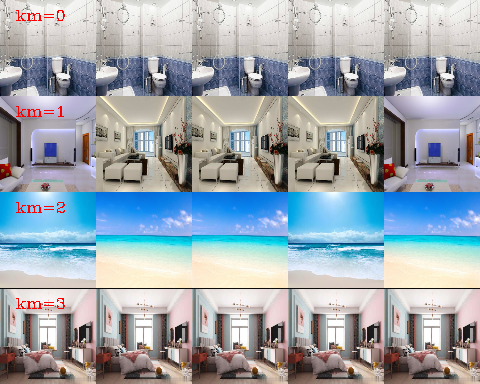

In [23]:
def images_kmeans(images: list, n_clusters:int = 2, use_bg=False):

    ### 读取图片，转化为数组
    all_images = []
    # for path in images:
    #     image = cv2.imread(path)
    #     image = cv2.resize(image, None, fx=0.5,fy=0.5)
    #     image = image.reshape(-1, )
    #     all_images.append(image)

    img_size = 300
    for img in images:
        cv2_img = pil2cv_img(img)
        cv2_img = cv2.resize(cv2_img, (img_size, img_size))
        all_images.append(cv2_img.reshape(-1,))

    ### 数组聚类
    clt = KMeans(n_clusters=n_clusters)
    clt.fit(all_images)
    labelIDs = np.unique(clt.labels_)
    print(f"聚类结果：{labelIDs}")

    ### 显示聚类结果
    km_res = []
    box_size = 96
    bg = np.zeros((100,100, 3),np.uint8)
    bg.fill(200)
    print(bg.shape)
    for labelID in labelIDs:
        # max_class = max([clt.labels_.tolist().count(x) for x in labelIDs])
        max_class = 5
        show_box = []
        idxs = np.where(clt.labels_ == labelID)[0]
        
        if use_bg:
            idxs = idxs.tolist() + [-1]*(max_class - len(idxs)) if len(idxs) < max_class else idxs ### 不允许重复， 列图像不够使使用背景图像补充
            for i in idxs:
                image = bg.copy()  if i == -1 else all_images[i].reshape(img_size, img_size, 3)
                image = cv2.resize(image, (box_size, box_size))
                show_box.append(image)
        else:
            idxs = np.random.choice(idxs, size= max_class, replace=True) ### 不够时自动补充, 方法1：
            for i in idxs:
                image = all_images[i].reshape(img_size, img_size, 3)
                image = cv2.resize(image, (box_size, box_size))
                show_box.append(image)
        
        km_label = f"km={labelID}"
        show_box = np.hstack(np.array(show_box))
        cv2.putText(show_box, km_label, (15, 20), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,255), 1)
        km_res.append(show_box)
    km_res = np.vstack(km_res)

    return cv2_pilimg(km_res)


images_kmeans(imgs, n_clusters=4, use_bg=False)

聚类结果：[0 1]
(100, 100, 3)


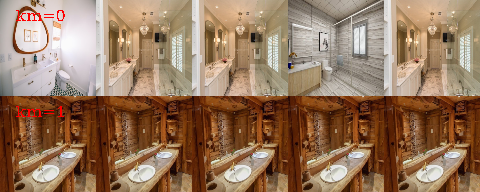

In [73]:
local_imgs = list(map(Image.open, imgfiles))
images_kmeans(local_imgs, n_clusters=2, use_bg=False)